In [2]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
import astropy.constants as astroconst
import os

In [3]:
h = astroconst.h.value
c = astroconst.c.value
Ms = astroconst.M_sun.value
G = astroconst.G.value

m = 1
M = m * Ms
n = 10000
T= 30
Rs = 2.*G*M/c**2
#r0 = 5.8e10
r0 = 3./2.
vr0 = 0
#L = 1.6e-14 * 3000*Rs *c**2 
L = 2.67e40 #3e4 * 1.5e11 
phi = -np.pi/2
cmd = "src/bhg -r %f -L %f -n %d -T %f -p %f -M %f -g"%(r0,L,n,T,phi,m)
print(cmd)
os.system(cmd)

src/bhg -r 1.500000 -L 26700000000000001306768281942097752227840.000000 -n 10000 -T 30.000000 -p -1.570796 -M 1.000000 -g


0

In [ ]:
m = 1
M = m*Ms
Rs = 2.*G*M/c**2
#r_range = np.linspace(0.7,3,5)*1e11 / Rs
r_range = np.linspace(1.1,3,14)
vr0 = 0
T = 2
n = 1000
phi = -np.pi/2
L = 1.6e-14 * 30*Rs *c**2 
print(L)
L= 2e8
circle = plt.Circle((0, 0), 1, color='black')
fig,ax = plt.subplots()
fig.set_size_inches(6,6)
limit = 5
plt.ylim(-limit,limit)
plt.xlim(-limit,limit)
plt.gca().set_aspect('equal', adjustable='box')
r0 = 1.5
cmd = "src/bhg -r %f -v %f -L %f -n %d -T %f -p %f -M %f -g"%(r0,vr0,L,n,T,phi,m)
fallen = os.system(cmd)
data = np.loadtxt('Geodesic.out')
if(fallen):
    print("Fallen to the black hole!")
    #continue
#phi += (2*np.pi/len(r_range))
xcoord = data[:,1] * np.cos(data[:,3]) / Rs
ycoord = data[:,1] * np.sin(data[:,3]) / Rs
cmap = plt.get_cmap('plasma')
colors = [cmap(i) for i in np.linspace(0, 1, 15)]
plt.plot(xcoord,ycoord, '-o', ms=0.01, label='R0 = %.2f'%r0, color = colors[0])
for i,r0 in enumerate(r_range):
    cmd = "src/bhg -r %f -v %f -L %f -n %d -T %f -p %f -M %f -g"%(r0,vr0,L,n,T,phi,m)
    fallen = os.system(cmd)
    data = np.loadtxt('Geodesic.out')
    if(fallen):
        print("Fallen to the black hole!")
        if(data.ndim==1): continue
        #continue
    
    #phi += (2*np.pi/len(r_range))
    xcoord = data[:,1] * np.cos(data[:,3]) / Rs
    ycoord = data[:,1] * np.sin(data[:,3]) / Rs
    plt.plot(xcoord,ycoord, '-o', ms=0.01, label="R0 = %.2f"%r0, color = colors[i+1])
ax.add_artist(circle)
plt.xlabel("x [R/Rs]")
plt.ylabel("y [R/Rs]")

plt.legend(prop={'size':9})

plt.savefig("photon_geodesics.eps")

In [ ]:
print(data)

In [ ]:
data = np.loadtxt('Geodesic.out')
plt.plot(data[:,0],data[:,3])
xcoord = data[:,1] * np.cos(data[:,3]) / Rs
ycoord = data[:,1] * np.sin(data[:,3]) / Rs
print(data)
circle = plt.Circle((0, 0), 1, color='black')
fig,ax = plt.subplots()
ax.add_artist(circle)
limit = 10
plt.ylim(-limit,limit)
plt.xlim(-limit,limit)
plt.gca().set_aspect('equal', adjustable='box')
xcoord2=xcoord
ycoord2=ycoord
plt.plot(xcoord2,ycoord2, '-o', ms=1)
plt.savefig("asd.png")

0.966083573784
1.006223218837867e+16
0.876588866303


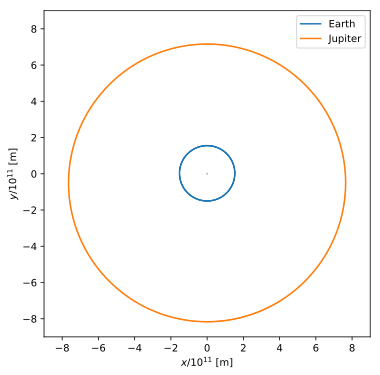

In [54]:
m = 1
M = m*Ms
Rs = 2.*G*M/c**2
#r_range = np.linspace(0.7,3,5)*1e11 / Rs

vr0 = 0
T = 4e8
n = 1000
phi = -np.pi/2
circle = plt.Circle((0, 0), astroconst.R_sun.value/10**11, color='black')
fig,ax = plt.subplots()
fig.set_size_inches(6,6)
limit = 9e11 /10**11
plt.ylim(-limit,limit)
plt.xlim(-limit,limit)
plt.gca().set_aspect('equal', adjustable='box')


L = 3e4 * 1.5e11 #1.6e-14 * 30*Rs *c**2 
r0 = 1.5e11 / Rs
cmd = "src/bhg -r %f -v %f -L %f -n %d -T %f -p %f -M %f"%(r0,vr0,L,n,T,phi,m)
fallen = os.system(cmd)
data = np.loadtxt('Geodesic.out')
#phi += (2*np.pi/len(r_range))
xcoord = data[:,1] * np.cos(data[:,3]) 
ycoord = data[:,1] * np.sin(data[:,3]) 
plt.plot(xcoord/10**11,ycoord/10**11, '-o', ms=0.01, label="Earth")
print(min(data[:,1])/max(data[:,1]) )

L = 1.91e43 / astroconst.M_jup.value #1.2e4 * 5.2*1.5e11
print(L)
r0 = 816.62e9 / Rs
cmd = "src/bhg -r %f -v %f -L %f -n %d -T %f -p %f -M %f"%(r0,vr0,L,n,T,phi,m)
fallen = os.system(cmd)
data = np.loadtxt('Geodesic.out')
#phi += (2*np.pi/len(r_range))
xcoord = data[:,1] * np.cos(data[:,3])
ycoord = data[:,1] * np.sin(data[:,3]) 
plt.plot(xcoord/10**11,ycoord/10**11, '-o', ms=0.01, label="Jupiter")
plt.xlabel(r"$x / 10^{11}$ [m]")
plt.ylabel(r"$y / 10^{11}$ [m]")
print(min(data[:,1])/max(data[:,1]) )
ax.add_artist(circle)
plt.legend()
plt.savefig("SolarSystem.eps")


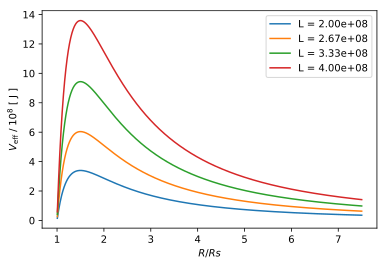

In [51]:
L0 = 2e8#1.6e-14 * 30*Rs *c**2 
r0 = 3./2.
L_range = np.linspace(L0, 2*L0, 4)
for L in L_range:
    cmd = "src/bhg -r %f -L %f -g -f rubish.out -V"%(r0,L)
    os.system(cmd)
    vef = np.loadtxt('Veff.out', skiprows=0)
    plt.plot(vef[:,0]/Rs, vef[:,1]/1.e8, label = 'L = %.2e'%L)

plt.xlabel(r"$R/Rs$")
plt.ylabel(r"$V_\mathrm{eff} \; / \; 10^8$ [ J ]")
plt.legend()
plt.savefig("Veff_photon.eps")

In [ ]:
m = 1
M = m*Ms
Rs = 2.*G*M/c**2
vr0 = 0
T = 0.001
n = 10000
phi = -np.pi/2
L0 = np.sqrt(12)*G*M/c

circle = plt.Circle((0, 0), 1, color='black')
fig,ax = plt.subplots()
fig.set_size_inches(6,6)
limit = 15
plt.ylim(-limit,limit)
plt.xlim(-limit,limit)
plt.gca().set_aspect('equal', adjustable='box')
r0 = 3
L_range = [L0, 1.1*L0, 1.2*L0, 1.3*L0, L0/2, 1.4*L0]
r_range = [3, r(1.1*L0)[0]/Rs, r(1.2*L0)[0]/Rs, r(1.3*L0)[0]/Rs, 2.5, 6]

cmap = plt.get_cmap('plasma')
colors = [cmap(i) for i in np.linspace(0, 1, len(L_range))]

for i,L in enumerate(L_range):
    r0 = r_range[i]
    cmd = "src/bhg -r %f -v %f -L %f -n %d -T %f -p %f -M %f"%(r0,vr0,L,n,T,phi,m)
    fallen = os.system(cmd)
    data = np.loadtxt('Geodesic.out')
    if(fallen):
        print("Fallen to the black hole!")
        if(data.ndim==1): continue
        #continue
    
    xcoord = data[:,1] * np.cos(data[:,3]) / Rs
    ycoord = data[:,1] * np.sin(data[:,3]) / Rs
    plt.plot(xcoord,ycoord, '-o', ms=0.01, label="L = %.2e"%L, color = colors[i])
ax.add_artist(circle)
plt.xlabel("x [R/Rs]")
plt.ylabel("y [R/Rs]")

plt.legend(prop={'size':5})

plt.savefig("massive_geodesics.eps")

In [ ]:
def r(L):
    arrel = np.sqrt(L**4 - 12 * G**2 * M**2 * L**2 / c**2 )
    den = 2*G*M
    return [(L**2 + arrel)/den, (L**2-arrel)/den]

In [ ]:
print(L_range)
print(r_range)

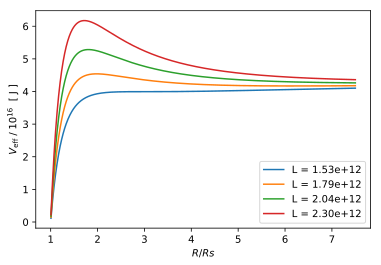

In [52]:
m = 1
M = m*Ms
Rs = 2.*G*M/c**2
vr0 = 0
T = 0.001
n = 10000
phi = -np.pi/2
L0 = 1 * np.sqrt(12)*G*M/c
L_range = np.linspace(L0,1.5*L0,4)
for L in L_range:
    cmd = "src/bhg -r %f -v %f -L %f -n %d -T %f -p %f -M %f -V"%(r0,vr0,L,n,T,phi,m)
    fallen = os.system(cmd)
    veff = np.loadtxt("Veff.out")
    #plt.ylim(3.5e16,4.2e16)
    plt.plot(veff[:,0]/Rs, veff[:,1]/1e16, label="L = %.2e"%L)
plt.xlabel(r"$R/Rs$")
plt.ylabel(r"$V_\mathrm{eff} \;/ \;10^{16}$  [ J ]")
plt.legend()
plt.savefig("Veff_massive.eps")


1.53349213926e+12
[[  1.00000000e+00   8.98755000e+16   1.53349000e+12]
 [  2.00000000e+00   8.98755000e+16   1.53349000e+12]
 [  3.00000000e+00   8.98755000e+16   1.53349000e+12]
 ..., 
 [  9.99700000e+03   8.98755000e+16   1.53349000e+12]
 [  9.99800000e+03   8.98755000e+16   1.53349000e+12]
 [  9.99900000e+03   8.98755000e+16   1.53349000e+12]]
339723645.0487888
[[  1.00000000e+00   3.39724000e+08   2.00000000e+08]
 [  2.00000000e+00   3.39724000e+08   2.00000000e+08]
 [  3.00000000e+00   3.39724000e+08   2.00000000e+08]
 ..., 
 [  9.99700000e+03   3.39724000e+08   2.00000000e+08]
 [  9.99800000e+03   3.39724000e+08   2.00000000e+08]
 [  9.99900000e+03   3.39724000e+08   2.00000000e+08]]


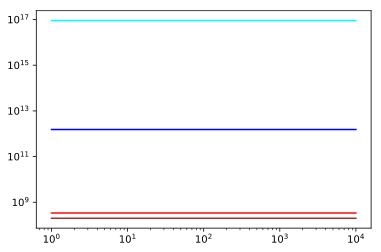

In [71]:
m = 1
M = m*Ms
Rs = 2.*G*M/c**2
vr0 = 0
T = 0.001
n = 10000
phi = -np.pi/2
L = 1 * np.sqrt(12)*G*M/c
print(L)
cmd = "src/bhg -r %f -v %f -L %f -n %d -T %f -p %f -M %f -V -C"%(r0,vr0,L,n,T,phi,m)
fallen = os.system(cmd)
conservation = np.loadtxt("ConservedQuantities.out")
plt.loglog(conservation[:,0],conservation[:,1], color='cyan')
plt.loglog(conservation[:,0],conservation[:,2], color='blue')
print(conservation)
L = 2e8
r0 = 3/2.
E = L**2/(2*(r0*Rs)**2) - G*M*L**2/(c**2 * (r0*Rs)**3)
print(E)
cmd = "src/bhg -r %f -v %f -L %f -n %d -T %f -p %f -M %f -g -V -C -E %f"%(r0,vr0,L,n,T,phi,m, E)
fallen = os.system(cmd)
conservation = np.loadtxt("ConservedQuantities.out")
plt.loglog(conservation[:,0],conservation[:,1], color='red')
plt.loglog(conservation[:,0],conservation[:,2], color='brown')
print(conservation)
